---
# **MOD 1: Rainfall Prediction using Machine Learning methods** #
---

**Goal:** Use machine learning methods **LogisticRegression, XGBClassifier, SVC, and RandomForestClassifier** with rainfall data to predict rainfall using data with variables listed below. 

**Pressure:** The force exerted on a surface per unit area, often referring to atmospheric pressure. It’s the weight of the air above us and can affect weather conditions. In meteorology, low pressure is associated with stormy weather, while high pressure generally leads to clear skies.

**MaxTemp:** Short for maximum temperature, this refers to the highest temperature reached during a specific period, like a day or a season.

**Temperature:** The measure of how hot or cold something is. In weather terms, it’s how warm or cold the air is, often measured in degrees Celsius or Fahrenheit.

**MinTemp:** Short for minimum temperature, it represents the lowest temperature reached in a specific time frame, such as during the night or a given day.

**Dewpoint:** The temperature at which air becomes saturated with moisture and water vapor begins to condense. When the air temperature drops to the dew point, fog or dew can form. It gives an indication of humidity.

**Humidity:** The amount of water vapor present in the air. It’s typically expressed as a percentage. High humidity can make it feel hotter, while low humidity can make the air feel cooler.

**Cloud:** A visible mass of condensed water vapor suspended in the atmosphere. Clouds come in various types, such as cumulus (fluffy) or stratus (layered), and play a role in weather patterns, including precipitation.

**Rainfall:** The amount of rain that falls over a particular area, often measured in millimeters or inches. *(yes=rain and no=no rain)*

**Sunshine:** The sunlight that reaches the Earth. It’s an indicator of how much of the sun’s rays are visible at a given location and time. More sunshine generally means clearer skies and warmer temperatures.

**Winddirection:** The direction from which the wind is blowing, typically measured in degrees (where 0° is north, 90° is east, etc.). It gives insight into weather patterns and can indicate changes in weather conditions.

**Windspeed:** The rate at which the wind is moving, usually measured in kilometers per hour (km/h) or miles per hour (mph). Higher wind speeds can signify storms or rough weather conditions.

In [ ]:
#  Pacakges
import pandas as pd
from sklearn.model_selection._split import train_test_split

from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn import metrics

import matplotlib.pyplot as plt 
from sklearn.metrics import ConfusionMatrixDisplay

import sklearn as sk
from sklearn.ensemble import RandomForestClassifier

from sklearn import metrics
from imblearn import over_sampling
import numpy as np
import seaborn as sb
import warnings 
warnings.filterwarnings('ignore')

---
# **MOD 2: Read Data** #
---

In [ ]:
path = "..."

# read in data
df = pd.read_csv(path + 'Rainfall.csv')

In [304]:
# remove whitespaces from column variables
df.columns = df.columns.str.strip()

In [305]:
# variables with non-null count and data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   day            366 non-null    int64  
 1   pressure       366 non-null    float64
 2   maxtemp        366 non-null    float64
 3   temparature    366 non-null    float64
 4   mintemp        366 non-null    float64
 5   dewpoint       366 non-null    float64
 6   humidity       366 non-null    int64  
 7   cloud          366 non-null    int64  
 8   rainfall       366 non-null    object 
 9   sunshine       366 non-null    float64
 10  winddirection  365 non-null    float64
 11  windspeed      365 non-null    float64
dtypes: float64(8), int64(3), object(1)
memory usage: 34.4+ KB


In [306]:
# five number summaries
df.drop(columns='day').describe().T

,count,mean,std,min,25%,50%,75%,max
pressure,366.0,1013.742623,6.414776,998.5,1008.500,1013.00,1018.100,1034.6
maxtemp,366.0,26.191257,5.978343,7.1,21.200,27.75,31.200,36.3
temparature,366.0,23.747268,5.632813,4.9,18.825,25.45,28.600,32.4
mintemp,366.0,21.894536,5.594153,3.1,17.125,23.70,26.575,30.0
dewpoint,366.0,19.989071,5.997021,-0.4,16.125,21.95,25.000,26.7
humidity,366.0,80.177596,10.062470,36.0,75.000,80.50,87.000,98.0
cloud,366.0,71.128415,21.798012,0.0,58.000,80.00,88.000,100.0
sunshine,366.0,4.419399,3.934398,0.0,0.500,3.50,8.200,12.1
winddirection,365.0,101.506849,81.723724,10.0,40.000,70.00,190.000,350.0
windspeed,365.0,21.536986,10.069712,4.4,13.700,20.50,27.900,59.5


**Observations**

Variables below had one missing value:

- winddirection
- windspeed 

In [307]:
# features 
col = df.drop(columns='rainfall').columns
col

# impute missing values for features
for i in col:
    if df[i].isnull().sum()>0:
        df[i] = df[i].fillna(df[i].mean())
         

In [308]:
# check for missing values after imputation
df.isnull().sum()

day              0
pressure         0
maxtemp          0
temparature      0
mintemp          0
dewpoint         0
humidity         0
cloud            0
rainfall         0
sunshine         0
winddirection    0
windspeed        0
dtype: int64

**Observations:**

- All variables now have no missing values

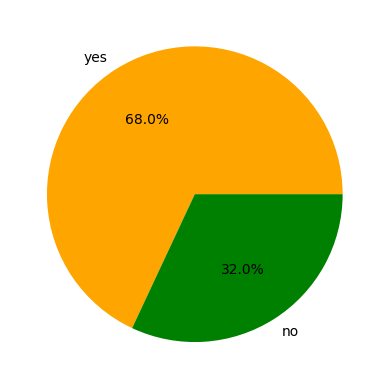

In [309]:
import matplotlib.pyplot as plt

plt.pie(df['rainfall'].value_counts().values,  labels = df['rainfall'].value_counts().index,  autopct='%1.1f%%', colors=['orange', 'green'])
plt.show()


In [310]:
df.groupby('rainfall').mean()

,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,sunshine,winddirection,windspeed
rainfall,,,,,,,,,,,
no,15.623932,1014.576923,27.070940,24.053846,21.957265,18.766667,73.000000,51.256410,7.586325,103.076923,19.275214
yes,15.819277,1013.350602,25.777912,23.603213,21.865060,20.563454,83.550201,80.465863,2.931325,100.769104,22.599747


**Observations:**

- Out of 367 days, 117 days (32%) had no rain and 249 days (68%) had rain.
- Days with rain had:
  + Lower pressure
  + Lower temperature
  + higher dewpoint
  + higher humidity
  + higher cloud cover
  + Less sunshine
  + higher wind flow
  + higher wind speed

In [311]:
df['rainfall'].value_counts()

rainfall
yes    249
no     117
Name: count, dtype: int64

In [312]:
# create a list of features
features = list(df.select_dtypes(include = np.number).columns) 
features.remove('day')
features

['pressure',
 'maxtemp',
 'temparature',
 'mintemp',
 'dewpoint',
 'humidity',
 'cloud',
 'sunshine',
 'winddirection',
 'windspeed']

In [313]:
df.head()

,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,rainfall,sunshine,winddirection,windspeed
0,1,1025.9,19.9,18.3,16.8,13.1,72,49,yes,9.3,80.0,26.3
1,2,1022.0,21.7,18.9,17.2,15.6,81,83,yes,0.6,50.0,15.3
2,3,1019.7,20.3,19.3,18.0,18.4,95,91,yes,0.0,40.0,14.2
3,4,1018.9,22.3,20.6,19.1,18.8,90,88,yes,1.0,50.0,16.9
4,5,1015.9,21.3,20.7,20.2,19.9,95,81,yes,0.0,40.0,13.7


---
# **MOD 3: Univariate Plots** #
---

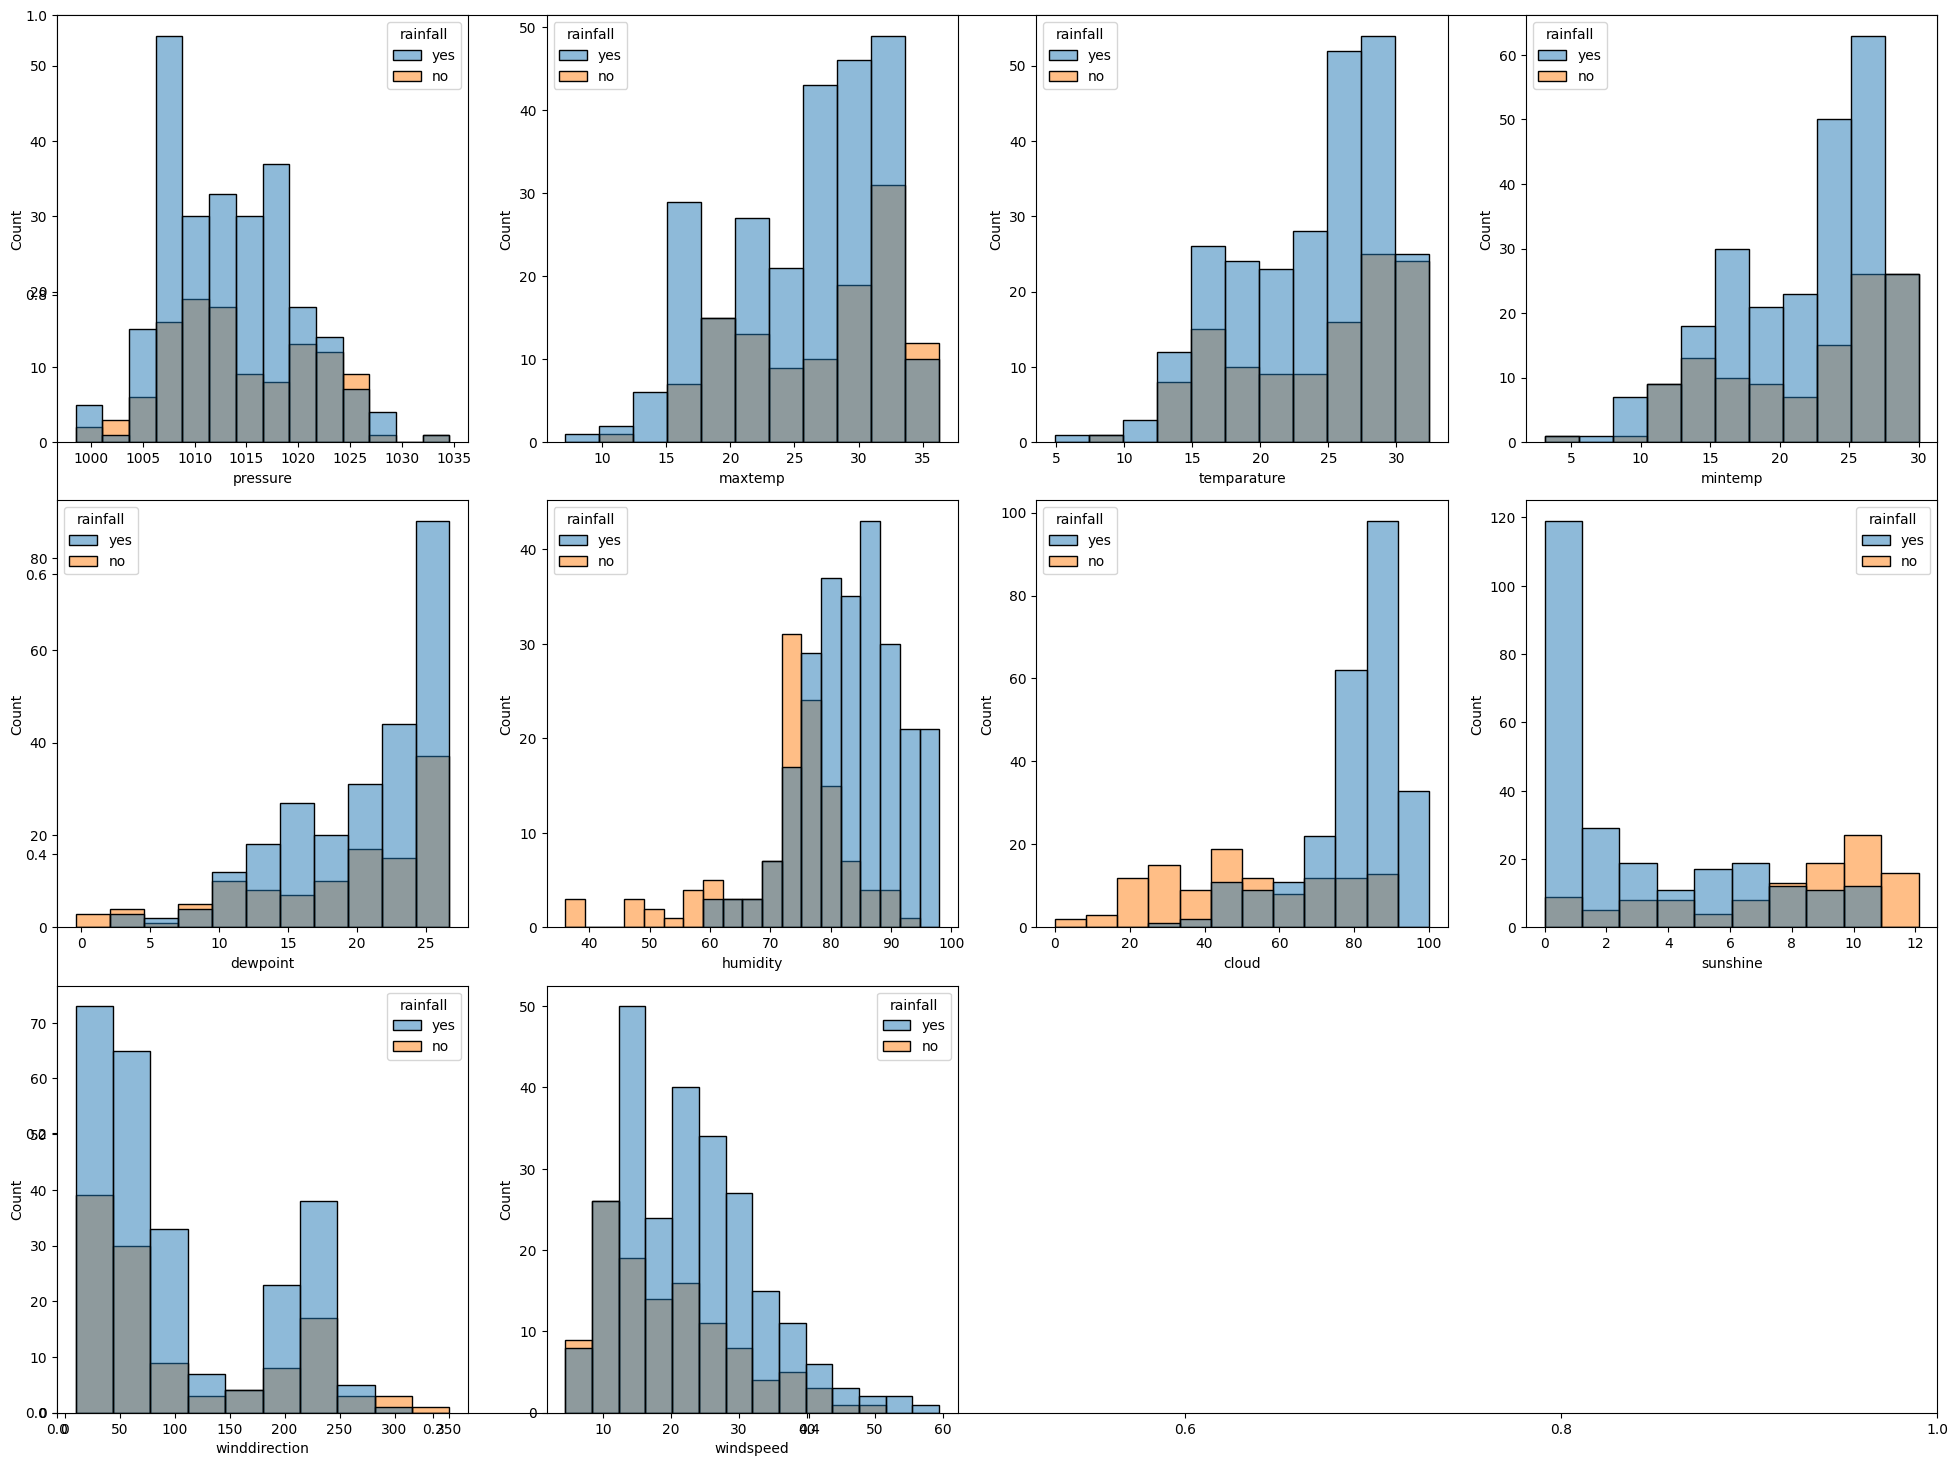

In [314]:
plt.subplots(figsize=(20,15))

for i, col in enumerate(features):
 
  plt.subplot(3,4, i + 1)
  sb.histplot(data=df, x= col, hue='rainfall')
plt.tight_layout()
plt.show()


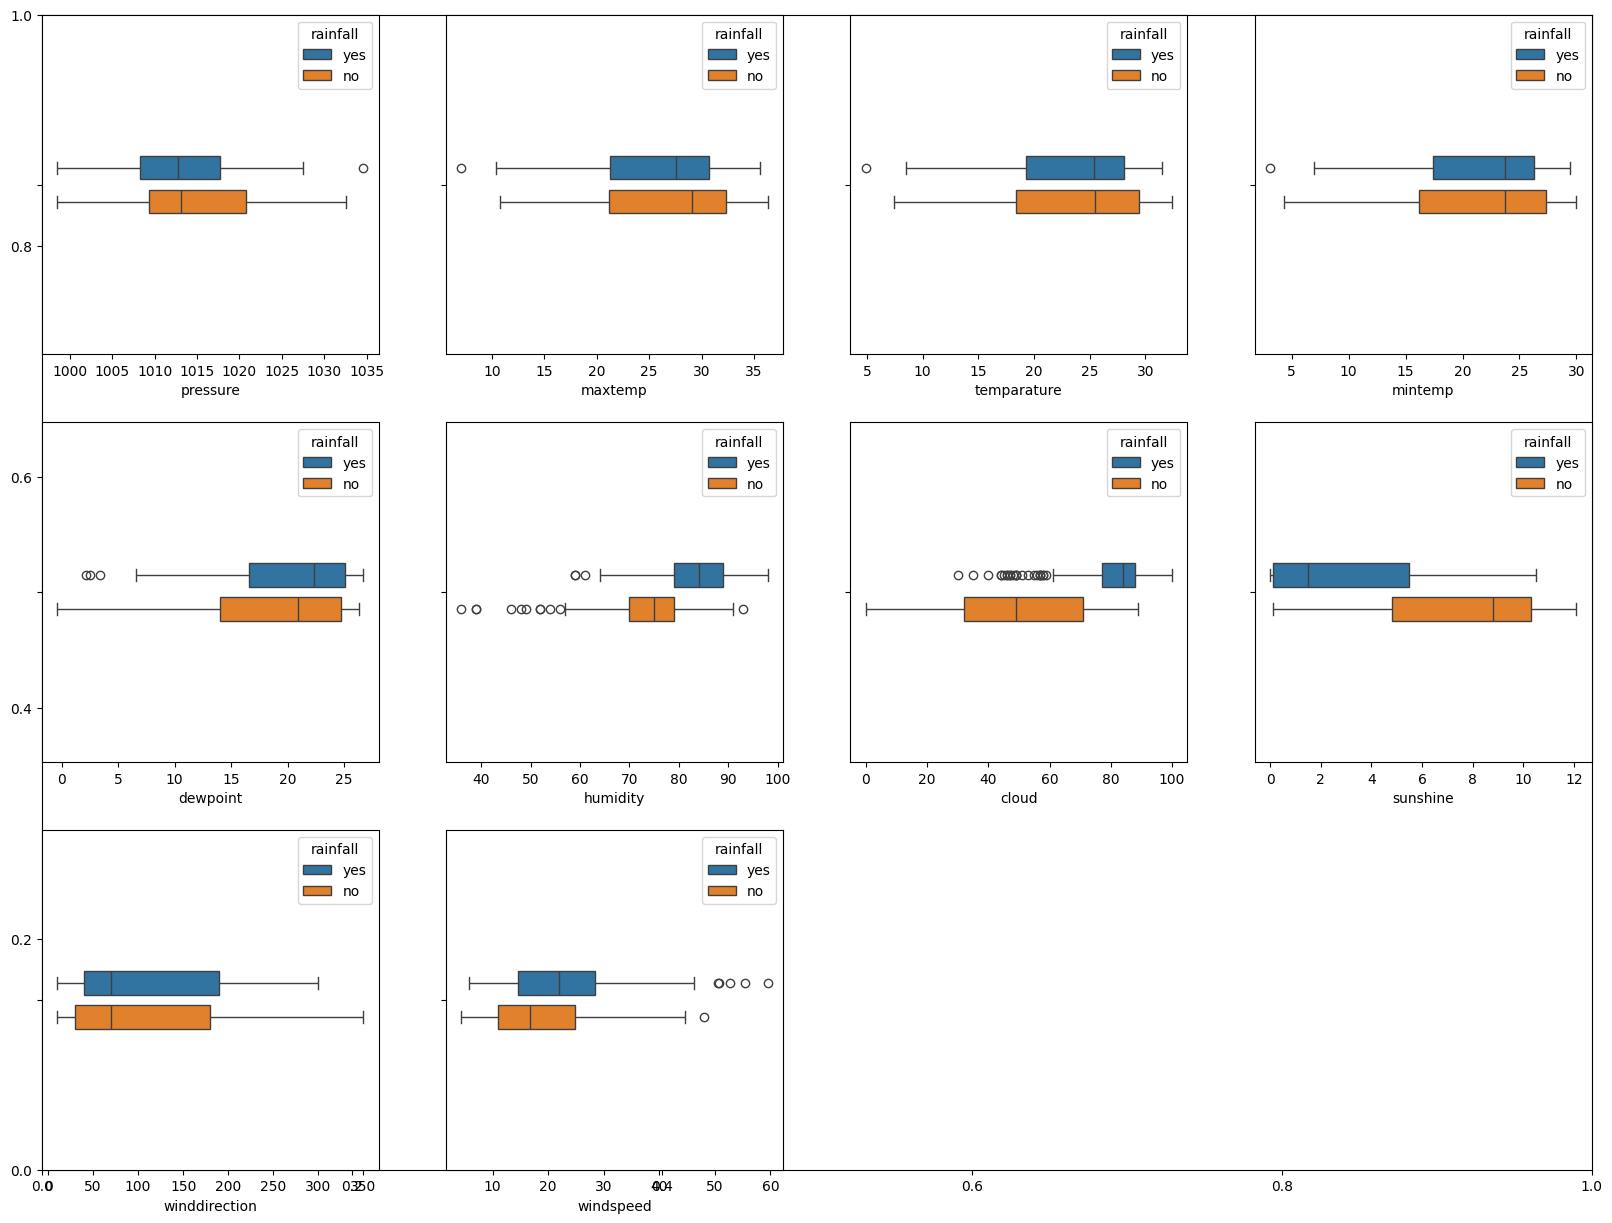

In [315]:
plt.subplots(figsize=(20,15))

for i, col in enumerate(features):
  plt.subplot(3,4, i + 1)
  # sb.boxplot(df[col])
  sb.boxplot(data = df, x = col, hue='rainfall', width=0.2, gap=0.3)
# plt.tight_layout()
plt.show()


**Observations**

- Comparing rainy days with days without rain, it can be seen that rainy days had:
  + Lower pressure than non-rainy days
  + Lower temperature than non-rainy days
  + higher dewpoint than non-rainy days
  + higher humidity than non-rainy days
  + higher cloud cover than non-rainy days
  + Less sunshine than non-rainy days
  + higher wind flow than non-rainy days
  + higher wind speed than non-rainy days

---
# **MOD 4: Correlation Analysis** #
---

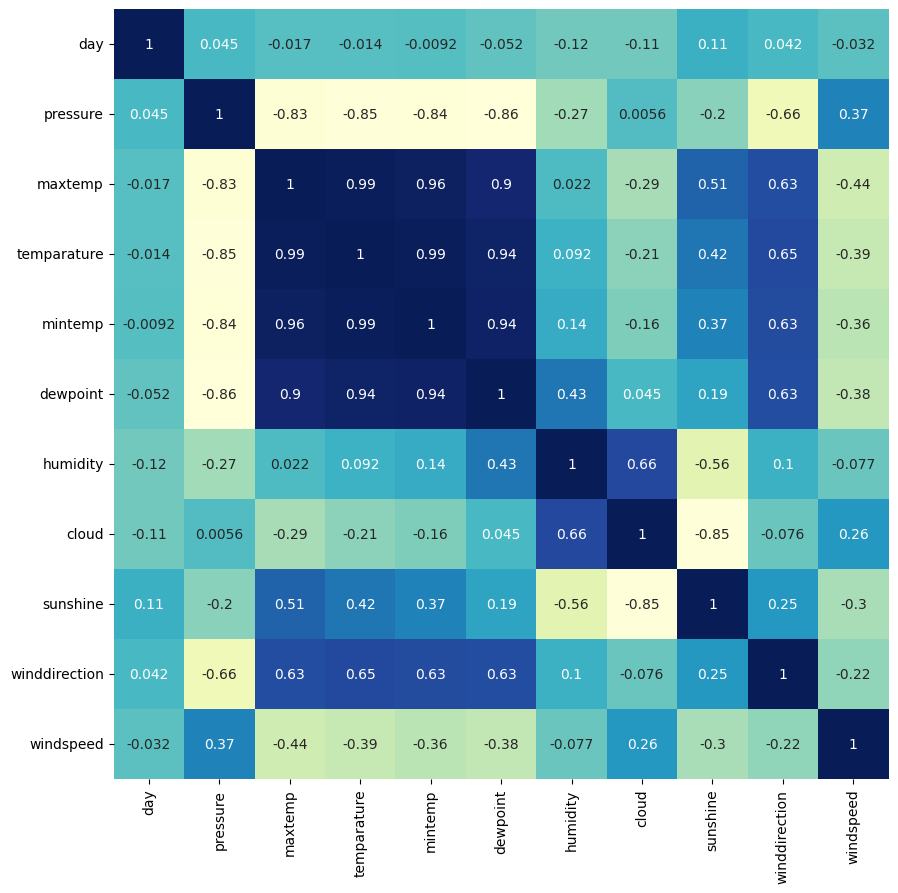

In [316]:
plt.figure(figsize=(10,10))
sb.heatmap(df.drop(columns='rainfall').corr() ,  annot=True, cbar=False, cmap='YlGnBu')
plt.show()

**Observations**

- Variable below had correlation over 80%:
  + maxtemp
  + temperature
  + mintemp
  + dewpoint 
- To avoid multicollinearity, variables: maxtemp and mintemp were dropped during modeling

---
# **MOD 5: Split into train-test dataset; Oversample minority group** #
---

In [317]:
# drop variable to avoid multicollinearity
df.drop(columns=['maxtemp', 'mintemp', 'day'], axis=1, inplace=True)

In [318]:
# recode rainfall (yes=1 and no=0)
df['rainfall'] = df['rainfall'].map({'yes':1, 'no':0}) 

# split features from labels
X = df.drop(['rainfall'], axis=1)
y = df.rainfall

In [319]:
# split data in train and test datasets
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, stratify=y,  random_state=2)


In [320]:
# oversample minority group to balance the outcome variable
from imblearn.over_sampling import SMOTE
from collections import Counter

counter = Counter(Y_train)
print('Before', counter)

# oversampling the train dataset using SMOTE
smt = SMOTE()
X_train_sm, y_train_sm = smt.fit_resample(X_train, Y_train)

counter = Counter(y_train_sm)
print('After', counter)


Before Counter({1: 199, 0: 93})
After Counter({1: 199, 0: 199})


---
# **MOD 6: Modeling - Logistic Regression; XGBClassifier; SVC; RandomForestClassifier** #
---

In [321]:
# fit four classification models and compare their performance
mod = [LogisticRegression(), XGBClassifier(), SVC(kernel='rbf', probability=True), RandomForestClassifier(n_estimators=100, max_depth=2, random_state=0)]
print(mod) 

[LogisticRegression(), XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...), SVC(probability=True), RandomForestClassifier(max_depth=2, random_state=0)]


In [322]:

for i in range(len(mod)):
    # fit model using oversampled train X and y
    mod[i].fit(X_train_sm, y_train_sm)

    # list of model to be fitted
    mod_lab_lst = ["LogisticRegression", 'XGBClassifier', 'SVC', 'RandomForestClassifier']
   
    # predict Y from for each of the four models
    Y_pred = mod[i].predict_proba(X_test) 
    print(f'Training Accuracy {mod_lab_lst[i]}:', 100 * round ( metrics.roc_auc_score(Y_test, Y_pred[:,1]), 2) )

    print("=====================================")
    print()


Training Accuracy LogisticRegression: 89.0

Training Accuracy XGBClassifier: 83.0

Training Accuracy SVC: 76.0

Training Accuracy RandomForestClassifier: 90.0



**Observations**

- Both Logistic regressiona and random forest classifiers had roughly the same accuracy (~89%):
 
- XGBClassifier amd SVC both had lower accuracy of (~84%)

---
# **MOD 7: Evaluate Models** #
---

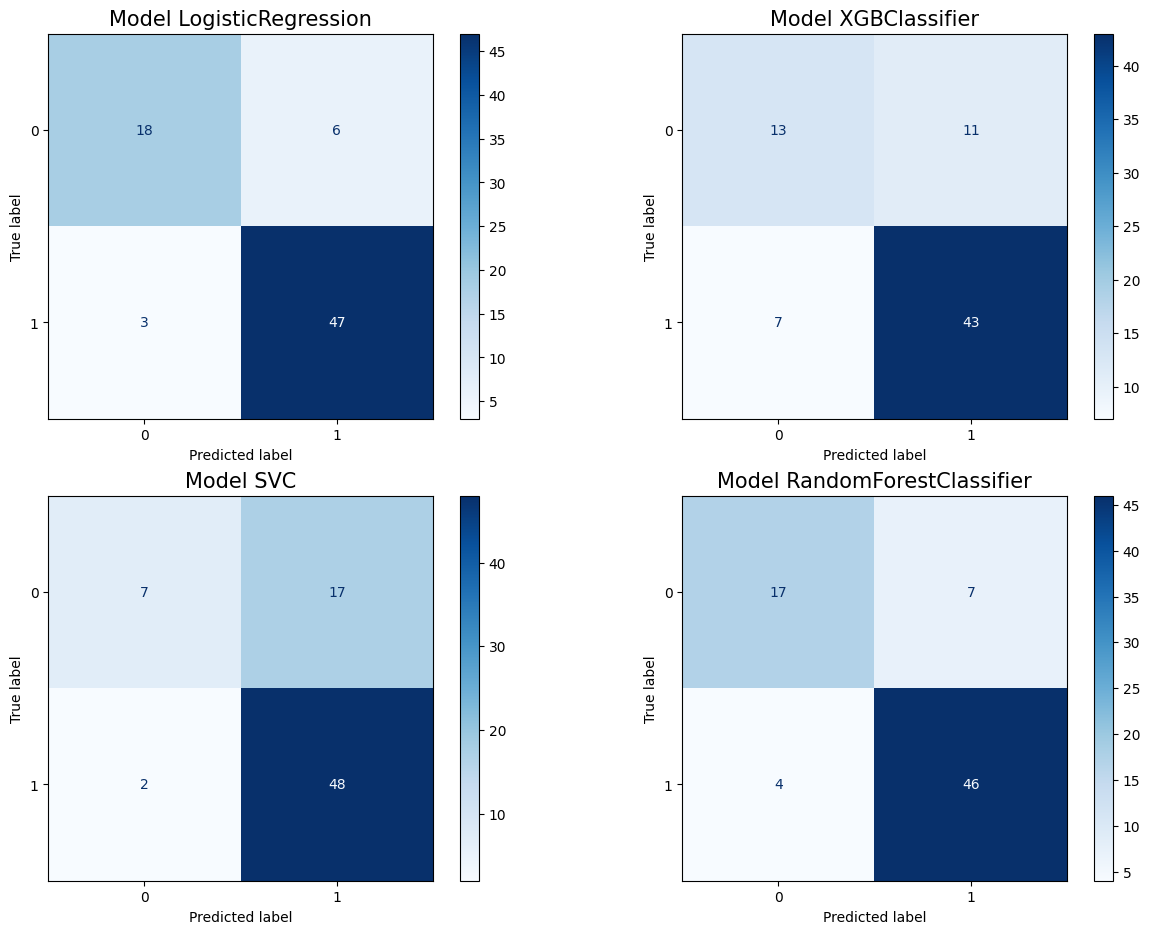

In [323]:
# confusion matrices for the four models
title_size = 15
values_format = ".1f" 
colorbar = False
cmap = "Blues"

# 2x2 plots
f, axes = plt.subplots(2, 2, figsize=(15, 11))

# plots
ct =0 
for row_ind in [0,1]:
    for col_ind in [0,1]:
        axes[row_ind, col_ind].set_title(f"Model {mod_lab_lst[ct]}", size=title_size)
        ConfusionMatrixDisplay.from_estimator(mod[ct], X_test, Y_test, ax=axes[row_ind, col_ind], cmap='Blues')
        ct = ct + 1

**Observations**

- Both Logistic regressiona and random forest classifiers had better accuracy about 89% than XGBClassifier amd SVC with both having accuracy of about 84%

In [324]:
for i in range(len(mod)):
    print(f"Metrics measures for model: {mod_lab_lst[i]}") 
    print("=========================================================")
    print(metrics.classification_report(Y_test, mod[i].predict(X_test)))
    print()

Metrics measures for model: LogisticRegression
              precision    recall  f1-score   support

           0       0.86      0.75      0.80        24
           1       0.89      0.94      0.91        50

    accuracy                           0.88        74
   macro avg       0.87      0.84      0.86        74
weighted avg       0.88      0.88      0.88        74


Metrics measures for model: XGBClassifier
              precision    recall  f1-score   support

           0       0.65      0.54      0.59        24
           1       0.80      0.86      0.83        50

    accuracy                           0.76        74
   macro avg       0.72      0.70      0.71        74
weighted avg       0.75      0.76      0.75        74


Metrics measures for model: SVC
              precision    recall  f1-score   support

           0       0.78      0.29      0.42        24
           1       0.74      0.96      0.83        50

    accuracy                           0.74        74
   ma

**Observations**

* F1 score is a great way to assess models where both precision and recall are crucial, particularly in the case of imbalanced data.

* Below are F1 scores for the four models fitted above.

    - F1_score - Logistic regression = 91%

    - F1_score - XGBClassifier = 83%

    - F1_score - SVC = 83%

    - F1_score - RandomForestClassifier = 89%

Here, Logistic regression seems to outperform the other models. 

----